In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 导入一个鸢尾花数据尝试用线性回归做分类

In [148]:
data = datasets.load_iris()
X = np.mat(np.c_[np.ones(data.data.shape[0]),data.data[:,-1:]])[data.target<2]
Y = data.target[data.target<2]

In [149]:
(X.T*X).I*X.T*Y[:,None]

matrix([[-0.17114901],
        [ 0.85387914]])

In [150]:
liner = np.array(np.dot(np.dot(np.dot(X.T,X).I,X.T),Y))[0]
liner

array([-0.17114901,  0.85387914])

### 求损失最小参数

In [151]:
np.dot(liner,np.r_[(np.array([1]),np.array(X[-1][:,-1:])[0])])

0.9388938786353123

In [152]:
pr = lambda number : np.dot(liner,np.r_[(np.array([1]),number)]) 

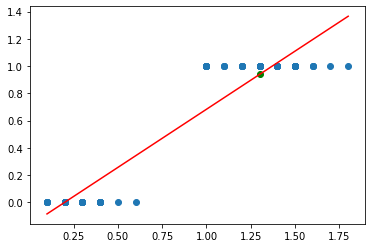

In [153]:
plt.scatter(np.array(X[:,-1:]),Y)
plt.plot([X[:,-1:].min(),X[:,-1:].max()],[pr(X[:,-1:].min()),pr(X[:,-1:].max())],c='r')
plt.scatter(np.array(X[-1][:,-1:])[0][0],np.dot(liner,np.r_[(np.array([1]),np.array(X[-1][:,-1:])[0])]),c='g')

### 可以看到，作用于分类，线性回归不是很合适

In [154]:
from os import system

## 线性回归的假设函数
## $$ h_\theta (X) = X \theta $$

## sigmoid 函数
## $$ sigmoid(X) = 1/1+e^{-X}  $$

## 逻辑回归的假设函数
## $$ h_\theta (X) = 1/{1+e^{-(X^{T} \theta)}} $$

## $$ h_\theta (X) = 1/{1+e^{-(X^{T} \theta)}} = P(Y=1|X;0)$$

In [155]:
def H(X,theta):
    return np.dot(np.squeeze(np.array(X)),theta)

In [156]:
def Sigmoid(X):
    return 1/(1+np.e**(-X))

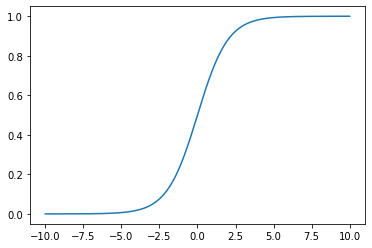

In [157]:
x_plot = np.linspace(-10., 10., 5000)
y_plot = Sigmoid(x_plot)
plt.plot(x_plot, y_plot)
plt.show()

## 画出x参数的所有假设函数参数为1时落下的点

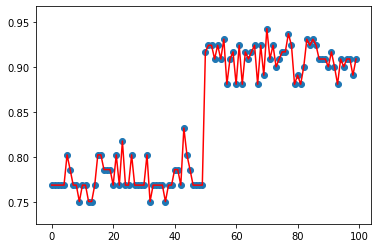

In [158]:
plt.scatter(np.arange(len(X)),1/(1+np.exp(-np.dot(np.array(X),np.ones((2,1))))))
plt.plot(1/(1+np.exp(-np.dot(np.array(X),np.ones((2,1))))) , c = 'r')

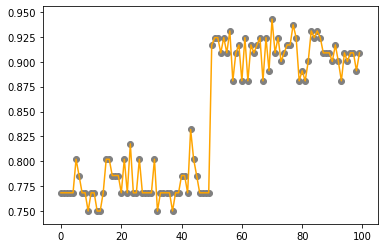

In [159]:
plt.plot(Sigmoid(H(X,np.ones(X.shape[-1]))),c='orange')
plt.scatter(np.arange(X.shape[0]),Sigmoid(H(X,np.ones(X.shape[-1]))),c = 'gray')

In [160]:
X[0]

matrix([[1. , 0.2]])

In [161]:
Sigmoid(H(X,np.zeros(X.shape[-1])))

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [162]:
Sigmoid(H(X,np.array([-3,1])))

array([0.05732418, 0.05732418, 0.05732418, 0.05732418, 0.05732418,
       0.06913842, 0.06297336, 0.05732418, 0.05732418, 0.05215356,
       0.05732418, 0.05732418, 0.05215356, 0.05215356, 0.05732418,
       0.06913842, 0.06913842, 0.06297336, 0.06297336, 0.06297336,
       0.05732418, 0.06913842, 0.05732418, 0.07585818, 0.05732418,
       0.05732418, 0.06913842, 0.05732418, 0.05732418, 0.05732418,
       0.05732418, 0.06913842, 0.05215356, 0.05732418, 0.05732418,
       0.05732418, 0.05732418, 0.05215356, 0.05732418, 0.05732418,
       0.06297336, 0.06297336, 0.05732418, 0.0831727 , 0.06913842,
       0.06297336, 0.05732418, 0.05732418, 0.05732418, 0.05732418,
       0.16798161, 0.18242552, 0.18242552, 0.15446527, 0.18242552,
       0.15446527, 0.19781611, 0.11920292, 0.15446527, 0.16798161,
       0.11920292, 0.18242552, 0.11920292, 0.16798161, 0.15446527,
       0.16798161, 0.18242552, 0.11920292, 0.18242552, 0.13010847,
       0.23147522, 0.15446527, 0.18242552, 0.14185106, 0.15446

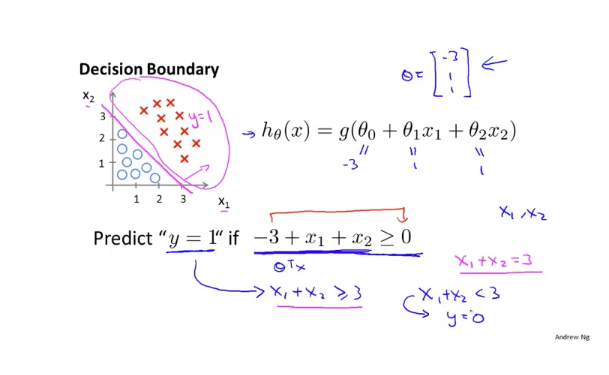

## $$ y = kx+b $$
## $$ \theta = [k , b] $$

### 异形的数据决策边界的分割方法类似于多项式回归
### 这个是圆形 $$ \theta_1X^{2}_1 + \theta_2X^{2}_2 = 1 $$
### 决策边界不是训练集的属性，是希望函数的属性

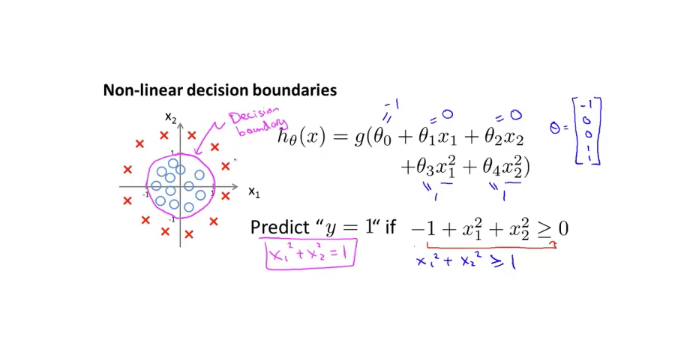

## 定义代价函数
$$ J(\theta) = - \frac{1}{m} [ \sum_{i=1}^{m} (y^{(i)}\log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\log{(1-h_{\theta}(x^{(i)}))})] + \lambda \frac{1}{2m} \sum_{j=1}^n \theta_j^2 $$ <br/>
其中，$ h_\theta(X) = g(\theta^T X) = sigmoid(\theta^T X)  $  <br/><br/>
$ \sum_{i=1}^{m} (y^{(i)}\log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\log{(1-h_{\theta}(x^{(i)}))}) $ 为 $ \sum cost $ 表示拟合程度 <br/><br/>
$ \lambda \sum_{j=1}^n \theta_j^2 $ 表示 $ L_2 $ 正则化，用来表示模型复杂度（作用时不要过拟合）

In [163]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [164]:
def J(theta, X, Y, theLambda=0):
    m, n = X.shape
    h = sigmoid(np.dot(X, theta))
    J = (-1.0/m)*(np.dot(np.log(h).T,Y)+np.dot(np.log(1-h).T,1-Y)) + (theLambda/(2.0*m))*np.sum(np.square(theta[1:]))
    if np.isnan(J[0]):
        return np.inf ## 无穷大
    # 其实J里面只有一个数值，需要取出该数值
    return J.flatten()[0]

梯度下降函数
$$ \theta_j := \theta_j - \alpha  \frac{1}{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} - \alpha \frac{\lambda}{m}\theta_j $$

In [165]:
def gradient(X, Y, options):
    '''
    options.alpha 学习率
    options.theLambda 正则参数λ
    options.maxLoop 最大迭代轮次
    options.epsilon 判断收敛的阈值
    options.method
        - 'sgd' 随机梯度下降
        - 'bgd' 批量梯度下降
    '''
    
    m, n = X.shape
    
    # 初始化模型参数，n个特征对应n个参数
    theta = np.zeros((n,1))
    
    cost = J(theta, X, Y)  # 当前误差
    costs = [cost]
    thetas = [theta]
    
    # Python 字典dict.get(key, default=None)函数返回指定键的值，如果值不在字典中返回默认值
    alpha = options.get('alpha', 0.01)
    epsilon = options.get('epsilon', 0.00001)
    maxloop = options.get('maxloop', 1000)
    theLambda = float(options.get('theLambda', 0)) # 后面有 theLambda/m 的计算，如果这里不转成float，后面这个就全是0
    method = options.get('method', 'bgd')
    
    # 定义随机梯度下降
    def _sgd(theta):
        count = 0
        converged = False
        while count < maxloop:
            if converged :
                break
            # 随机梯度下降，每一个样本都更新
            for i in range(m):
                h =sigmoid(np.dot(X[i].reshape((1,n)), theta))
                
                theta = theta - alpha*((1.0/m)*X[i].reshape((n,1))*(h-Y[i]) + (theLambda/m)*np.r_[[[0]], theta[1:]])
                thetas.append(theta)
                cost = J(theta, X, Y, theLambda)
                costs.append(cost)
                if abs(costs[-1] - costs[-2]) < epsilon:
                    converged = True
                    break
            count += 1
        return thetas, costs, count
    
    # 定义批量梯度下降
    def _bgd(theta):
        count = 0
        converged = False
        while count < maxloop:
            if converged :
                break
            
            h = sigmoid(np.dot(X, theta))
            theta = theta - alpha*((1.0/m)*np.dot(X.T, (h-Y)) + (theLambda/m)*np.r_[[[0]],theta[1:]])
            
            thetas.append(theta)
            cost = J(theta, X, Y, theLambda)
            costs.append(cost)
            if abs(costs[-1] - costs[-2]) < epsilon:
                converged = True
                break
            count += 1
        return thetas, costs, count
    
    methods = {'sgd': _sgd, 'bgd': _bgd}
    return methods[method](theta)   

In [171]:
originX ,Y = data.data[data.target<2] ,data.target[data.target<2]

In [172]:
m,n = originX.shape

In [173]:
X = np.concatenate((np.ones((m,1)), originX), axis=1)
X

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 5.4, 3.9, 1.7, 0.4],
       [1. , 4.6, 3.4, 1.4, 0.3],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 5.4, 3.7, 1.5, 0.2],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.3, 3. , 1.1, 0.1],
       [1. , 5.8, 4. , 1.2, 0.2],
       [1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 5.4, 3.9, 1.3, 0.4],
       [1. , 5.1, 3.5, 1.4, 0.3],
       [1. , 5.7, 3.8, 1.7, 0.3],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 5.4, 3.4, 1.7, 0.2],
       [1. , 5.1, 3.7, 1.5, 0.4],
       [1. , 4.6, 3.6, 1. , 0.2],
       [1. , 5.1, 3.3, 1.7, 0.5],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 5. , 3. , 1.6, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 4

In [174]:
# bgd
# 设置超参数
options = {
    'alpha':0.05,
    'epsilon':0.00000001,
    'maxloop':100000,
    'method':'bgd' # sgd
}


In [175]:
# 训练模型
import time
start = time.time()
thetas, costs, iterationCount = gradient(X, Y, options)
end = time.time()
btime = end - start
costs[-1], iterationCount, btime

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 100